In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_pickle("sarcasmv3.pkl")

In [3]:
data.head()

,author,comment,subreddit,parent_comment,label,comment_token,parent_comment_token
0,Trumpbart,nc and nh,politics,yeah i get that argument at this point i'd pre...,0,"[nc, and, nh]","[yeah, i, get, that, argument, at, this, point..."
1,Shbshb906,you do know west teams play against west teams...,nba,the blazers and mavericks the wests 5 and 6 se...,0,"[you, do, know, west, teams, play, against, we...","[the, blazers, and, mavericks, the, wests, 5, ..."
2,Creepeth,they were underdogs earlier today but since gr...,nfl,they're favored to win,0,"[they, were, underdogs, earlier, today, but, s...","[they're, favored, to, win]"
3,icebrotha,"this meme isn't funny none of the ""new york ni...",BlackPeopleTwitter,deadass don't kill my buzz,0,"[this, meme, isn't, funny, none, of, the, "", n...","[deadass, don't, kill, my, buzz]"
4,cush2push,i could use one of those tools,MaddenUltimateTeam,yep can confirm i saw the tool they use for th...,0,"[i, could, use, one, of, those, tools]","[yep, can, confirm, i, saw, the, tool, they, u..."


### Decided maybe the spread was too big, so I decided to get rid of the 2 four digit comments

In [4]:
def destroy(index):
    data.drop(data.index[index], inplace = True)
    data.reset_index(drop = True, inplace = True)
    all_words = [word for tokens in data["comment_token"] for word in tokens]
    sentence_lengths = [len(tokens) for tokens in data["comment_token"]]
    VOCAB = sorted(list(set(all_words)))
    print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
    print("Max sentence length is %s" % max(sentence_lengths))

In [5]:
data[data.comment_token.map(len) == 1434]

,author,comment,subreddit,parent_comment,label,comment_token,parent_comment_token
145117,12poulet21,patch notes general gameplay fixed technology ...,gaming,no man's sky has a new update and its huge,0,"[patch, notes, general, gameplay, fixed, techn...","[no, man's, sky, has, a, new, update, and, its..."


In [6]:
destroy(145117)

10717208 words total, with a vocabulary size of 168246
Max sentence length is 1247


In [7]:
data[data.comment_token.map(len) == 1247]

,author,comment,subreddit,parent_comment,label,comment_token,parent_comment_token
359549,ithinkPOOP,comcast comcast comcast comcast comcast comcas...,funny,10 months later and the swastika is still on t...,0,"[comcast, comcast, comcast, comcast, comcast, ...","[10, months, later, and, the, swastika, is, st..."


Now we have comments with 3 digit lengths!

In [8]:
destroy(359549)

10715961 words total, with a vocabulary size of 168244
Max sentence length is 284


In [9]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in data["comment_token"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data["comment_token"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

Using TensorFlow backend.


10715961 words total, with a vocabulary size of 168244
Max sentence length is 284


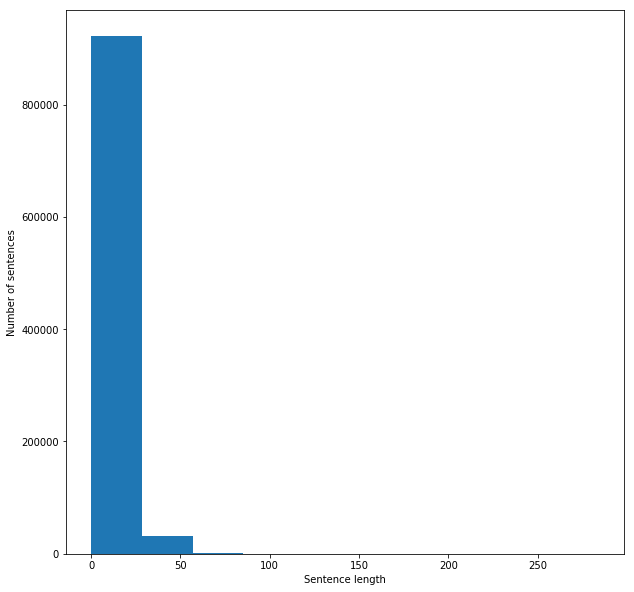

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

In [12]:
all_words = [word for tokens in data["parent_comment_token"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data["parent_comment_token"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

24666928 words total, with a vocabulary size of 236138
Max sentence length is 4281


In [14]:
all_words = data['subreddit']
word_lengths = [len(tokens) for tokens in data["subreddit"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max word length is %s" % max(word_lengths))

955615 words total, with a vocabulary size of 14300
Max word length is 21


In [13]:
features = data[['subreddit','comment','parent_comment']]
labels = data['label']

In [14]:
features.head()

,subreddit,comment,parent_comment
0,politics,nc and nh,yeah i get that argument at this point i'd pre...
1,nba,you do know west teams play against west teams...,the blazers and mavericks the wests 5 and 6 se...
2,nfl,they were underdogs earlier today but since gr...,they're favored to win
3,BlackPeopleTwitter,"this meme isn't funny none of the ""new york ni...",deadass don't kill my buzz
4,MaddenUltimateTeam,i could use one of those tools,yep can confirm i saw the tool they use for th...


In [15]:
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense,GlobalAveragePooling1D
from keras.layers.embeddings import Embedding
from keras.layers import Convolution1D, Flatten, Dropout,MaxPooling1D
from tensorflow.python.keras.preprocessing.text import Tokenizer

x_train_text, x_test_text, y_train, y_test = train_test_split(
      features, labels, test_size=0.2, random_state=42)

In [16]:
x_train_text.head()

,subreddit,comment,parent_comment
518197,pcmasterrace,killer app confirmed!,windows 10 comes with a 3d modeling program!
472026,PS4,yea its called playstationfourpointfive it wil...,is there any new version of ps4 coming?
580389,news,yes our government must take care of us withou...,to play devils advocate here we have no idea w...
309623,wow,daily beatings are good for the character,how to help my girlfriend's character? so my g...
108839,leagueoflegends,aurelion sol with stars?,jax with lamp posts


In [17]:
# Setting the max length of each feature

comment_top_words = 168000
parent_comment_top_words = 236000
subreddit_top_words = 14300

# Setting up Tokenizers

comment_tokenizer = Tokenizer(num_words= comment_top_words)
parent_tokenizer = Tokenizer(num_words = parent_comment_top_words)
subreddit_tokenizer = Tokenizer(num_words = subreddit_top_words)

# fitting each text

comment_tokenizer.fit_on_texts(features['comment'])
parent_tokenizer.fit_on_texts(features['parent_comment'])
subreddit_tokenizer.fit_on_texts(features['subreddit'])

# Turning each row into a Sequence of numbers

comment_train_tokens = comment_tokenizer.texts_to_sequences(x_train_text['comment'])
parent_train_tokens = parent_tokenizer.texts_to_sequences(x_train_text['parent_comment'])
subreddit_train_tokens = subreddit_tokenizer.texts_to_sequences(x_train_text['subreddit'])

test_comment_train_tokens = comment_tokenizer.texts_to_sequences(x_test_text['comment'])
test_parent_train_tokens = parent_tokenizer.texts_to_sequences(x_test_text['parent_comment'])
test_subreddit_train_tokens = subreddit_tokenizer.texts_to_sequences(x_test_text['subreddit'])

In [18]:
total_vocab = comment_top_words + parent_comment_top_words + subreddit_top_words

In [19]:
comment_train_tokens[0]

[2344, 1167, 540]

In [20]:
comment_dict = comment_tokenizer.word_index
inv_comment = {v: k for k, v in comment_dict.items()}

In [21]:
print(inv_comment[2344],inv_comment[1167], inv_comment[540])

killer app confirmed


In [22]:
parent_train_tokens[0]

[854, 200, 424, 16, 3, 3002, 14201, 1319]

In [23]:
parent_dict = parent_tokenizer.word_index
inv_parent = {v: k for k, v in parent_dict.items()}

In [24]:
print(inv_parent[854],inv_parent[200],inv_parent[424],inv_parent[16],inv_parent[3],inv_parent[3002],inv_parent[14201],inv_parent[1319])

windows 10 comes with a 3d modeling program


In [25]:
subreddit_train_tokens[0]

[5]

In [26]:
subreddit_dict = subreddit_tokenizer.word_index
inv_subreddit = {v: k for k, v in subreddit_dict.items()}

In [27]:
inv_subreddit[5]

'pcmasterrace'

In [28]:
def token_count(train, test):
    num_tokens = [len(tokens) for tokens in train + test]
    return num_tokens

def max_tokens(token_list):
    return np.mean(token_list) + 2.5 * np.std(token_list)

num_comment_token = token_count(comment_train_tokens,test_comment_train_tokens)
max_comment_token = max_tokens(num_comment_token)
max_comment_token = int(max_comment_token)

num_parent_token = token_count(parent_train_tokens,test_parent_train_tokens)
max_parent_token = max_tokens(num_parent_token)
max_parent_token = int(max_parent_token)

max_subreddit_token = 21

In [29]:
total_tokens = max_comment_token + max_parent_token + max_subreddit_token

In [30]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
pad = 'pre'

comment_train_pad = pad_sequences(comment_train_tokens, maxlen = max_comment_token, padding=pad, truncating=pad)
parent_train_pad = pad_sequences(parent_train_tokens, maxlen = max_parent_token, padding=pad, truncating=pad)
reddit_train_pad = pad_sequences(subreddit_train_tokens, maxlen = max_subreddit_token, padding=pad, truncating=pad)

comment_test_pad = pad_sequences(test_comment_train_tokens, maxlen=max_comment_token, padding=pad, truncating=pad)
parent_test_pad = pad_sequences(test_parent_train_tokens, maxlen = max_parent_token, padding=pad, truncating=pad)
reddit_test_pad = pad_sequences(test_subreddit_train_tokens, maxlen = max_subreddit_token, padding=pad, truncating=pad)

In [31]:
comment_train_pad.shape

(764492, 30)

In [32]:
parent_train_pad.shape

(764492, 129)

In [33]:
reddit_train_pad.shape

(764492, 21)

In [34]:
train_x = np.hstack([reddit_train_pad, comment_train_pad, parent_train_pad])
test_x = np.hstack([reddit_test_pad, comment_test_pad, parent_test_pad])

In [35]:
train_x.shape

(764492, 180)

In [36]:
test_x.shape

(191123, 180)

In [37]:
train_x.shape[1]

180

In [38]:
from keras.utils import to_categorical  # Makes "one-hot" encoding from label

y_train_hot = to_categorical(y_train, num_classes=2)
y_test_hot = to_categorical(y_test, num_classes=2)

In [39]:
print('total_vocab: ', total_vocab)
print('total_token: ', total_tokens)

total_vocab:  418300
total_token:  180


### Check if using GPU

In [42]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [43]:
model = Sequential()
model.add(Embedding(input_dim= total_vocab,
                    output_dim= 64,
                    input_length = total_tokens))

model.add(Convolution1D(256, 3, padding='same'))
model.add(Convolution1D(128, 3, padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Convolution1D(64, 3, padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Convolution1D(32, 3, padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Convolution1D(16, 3, padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Convolution1D(8, 3, padding='same'))
model.add(Convolution1D(8, 3, padding='same'))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(180,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_x, y_train_hot, epochs=10, batch_size = 200)


Epoch 1/10
764492/764492 [==============================] - 461s 603us/step - loss: 0.5625 - acc: 0.7058
Epoch 2/10
764492/764492 [==============================] - 456s 596us/step - loss: 0.4963 - acc: 0.7585
Epoch 3/10
764492/764492 [==============================] - 453s 593us/step - loss: 0.4278 - acc: 0.8030
Epoch 4/10
764492/764492 [==============================] - 453s 592us/step - loss: 0.3531 - acc: 0.8442
Epoch 5/10
764492/764492 [==============================] - 453s 592us/step - loss: 0.2847 - acc: 0.8782
Epoch 6/10
764492/764492 [==============================] - 454s 594us/step - loss: 0.2260 - acc: 0.9054
Epoch 7/10
764492/764492 [==============================] - 455s 595us/step - loss: 0.1817 - acc: 0.9248
Epoch 8/10
764492/764492 [==============================] - 453s 593us/step - loss: 0.1481 - acc: 0.9396
Epoch 9/10
764492/764492 [==============================] - 454s 594us/step - loss: 0.1248 - acc: 0.9497
Epoch 10/10
764492/764492 [============================

In [44]:
# Evaluation on the test set
scores = model.evaluate(test_x, y_test_hot, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 66.29%
